# Perceptron Coding


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris.data[:, :2]     # Using only first 2 features for visualization
y = (iris.target != 0).astype(int)  # Binary classification: class 0 vs others

## Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Perceptron Model

In [5]:
model = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
model.fit(X_train, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.01
,n_jobs,None
,random_state,42


## Evaluation

In [6]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Perceptron Accuracy:", acc)

Perceptron Accuracy: 1.0


## Visualization


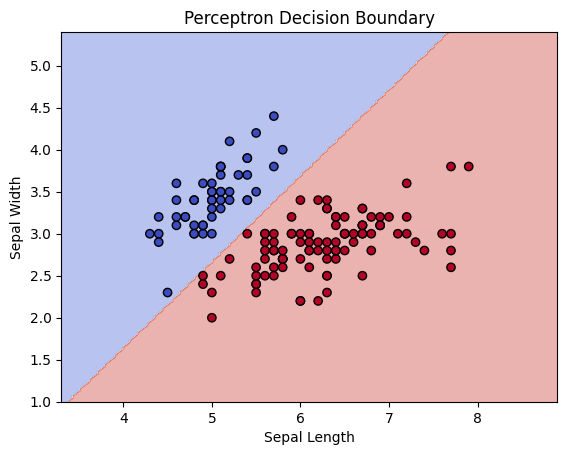

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Perceptron Decision Boundary")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()